# Getting Started in Machine Learning 

## Chapter 7: Spline Regression

This notebook contains examples from the book: 

_Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter_ (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019. 

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random

# Generate randomized (toy) data set

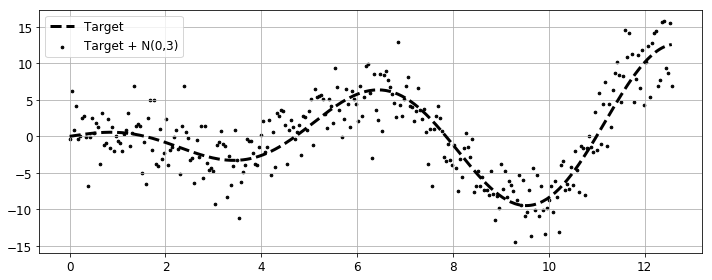

In [2]:
X=np.linspace(0,4*math.pi,300)

np.random.seed(99)
n=len(X)
Y=X*np.cos(X)+ np.random.normal(0,3,n)# 10*(np.random.random(n)-.5)
plt.scatter(X,Y,c="k",s=7,label="Target + N(0,3)")
plt.plot(X,X*np.cos(X),lw=3,ls="--",label="Target",c="k")
plt.legend(fontsize=12)
plt.grid()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
fig=plt.gcf()
fig.set_size_inches(10,4)
fig.tight_layout()
# fig.savefig("smoothing-spline-target.pdf")

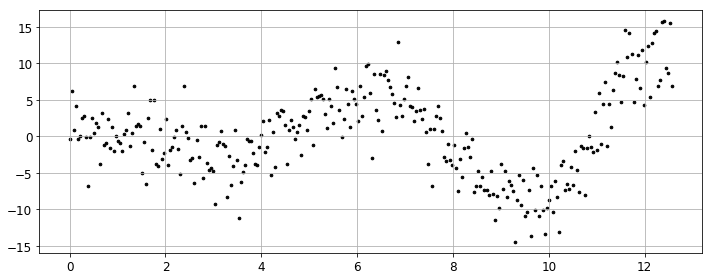

In [3]:
plt.scatter(X,Y,c="k",s=7)
#plt.plot(X,X*np.cos(X),lw=3,ls="--",label="Target",c="k")
#plt.legend(fontsize=12)
plt.grid()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
fig=plt.gcf()
fig.set_size_inches(10,4)
fig.tight_layout()
#fig.savefig("random-data-for-smoothing-spline.pdf")

generate arbitrary knots

In [4]:
#t1=[2,6,10]
#t2=np.linspace(1,12,12)

# First, illustrate a single train/test split

In [5]:
from sklearn.model_selection import train_test_split
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
XYTRAIN=list(zip(XTRAIN,YTRAIN))
XYTRAIN.sort()
XTRAIN,YTRAIN=zip(*XYTRAIN)

XYTEST=list(zip(XTEST,YTEST))
XYTEST.sort()
XTEST,YTEST=zip(*XYTEST)

In [6]:
from scipy.interpolate import LSQUnivariateSpline as LS
from scipy.interpolate import UnivariateSpline as US

from sklearn.metrics import mean_squared_error

## this line generates a fitting funtions
fit1=LS(XTRAIN,YTRAIN,[2,6,8])
fit2=LS(XTRAIN,YTRAIN,np.arange(1,12,1))
    ## this line generates predicted values using the fit functions
pred1=fit1(XTEST)
pred2=fit2(XTEST)

MSE1=mean_squared_error(pred1,YTEST)
MSE2=mean_squared_error(pred2,YTEST)

print("Mean Squared Error MSE1 =", MSE1)
print("Mean Squared Error MSE2 =", MSE2)

Mean Squared Error MSE1 = 11.614392145840794
Mean Squared Error MSE2 = 7.8669534504467356


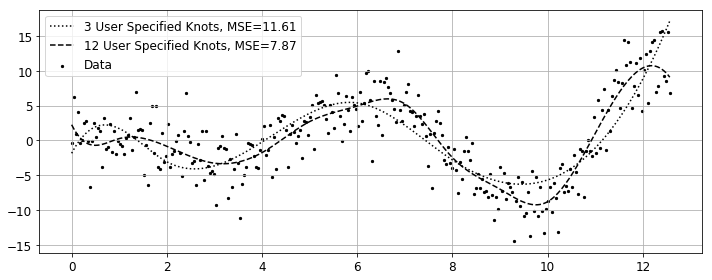

In [7]:
plt.plot(X,fit1(X),ls=":",label="3 User Specified Knots, MSE="+str(round(MSE1,2)),c="k")
plt.plot(X,fit2(X),ls="--",label="12 User Specified Knots, MSE="+str(round(MSE2,2)),c="k")
plt.scatter(X,Y,c="k",s=5,label="Data")

plt.legend(fontsize=12)
plt.grid()
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
fig=plt.gcf()
fig.set_size_inches(10,4)
fig.tight_layout()
#fig.savefig("smoothing-spline-user-specified-knots.pdf")

# repeat with multiple train/test splits
generate test and training set and fit LSQ Spline to arbitrary knots

In [8]:
def shakeupdata(X,Y):
    
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    
    # Sort data by X-values
    
    XYTRAIN=list(zip(XTRAIN,YTRAIN))
    XYTRAIN.sort()
    XTRAIN,YTRAIN=zip(*XYTRAIN)

    XYTEST=list(zip(XTEST,YTEST))
    XYTEST.sort()
    XTEST,YTEST=zip(*XYTEST)

    return(XTRAIN,YTRAIN,XTEST,YTEST)

In [9]:
nshakes=25

MSE1S=[]
MSE2S=[]
for j in range(nshakes):
    XTRAIN,YTRAIN,XTEST,YTEST=shakeupdata(X,Y)

    fit1=LS(XTRAIN,YTRAIN,[2,6,8])
    fit2=LS(XTRAIN,YTRAIN,np.arange(1,12,1))
    ## this line generates predicted values using the fit functions
    YP1=fit1(XTEST)
    YP2=fit2(XTEST)

    MSE1S.append(mean_squared_error(YP1,YTEST))
    MSE2S.append(mean_squared_error(YP2,YTEST))
mu1=np.mean(MSE1S)
s1=np.std(MSE1S,ddof=1)
mu2=np.mean(MSE2S)
s2=np.std(MSE2S,ddof=1)

In [10]:
mu1,s1,mu2,s2

(13.706129604877706, 1.960682385848656, 9.870836466329429, 1.0928780274540082)

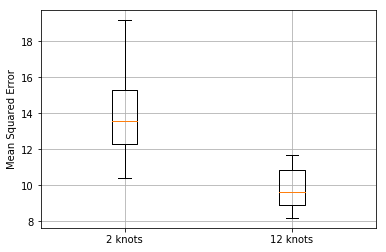

In [11]:
plt.boxplot([MSE1S,MSE2S]);
plt.xticks([1,2],["2 knots","12 knots"])
plt.grid()
plt.ylabel("Mean Squared Error")
fig=plt.gcf()
#fig.savefig("boxplots-mse-splines.pdf")

## Do univariate spline - use spline parameter,  do not define knot locations

skakeupsims runs a single simulation

it returns the mse for one test/train split as a function of split parameter



In [12]:
from math import log
np.logspace(2.5,5,3)

array([   316.22776602,   5623.4132519 , 100000.        ])

In [13]:
def shakeupsim(X,Y):
    XTRAIN,YTRAIN,XTEST,YTEST=shakeupdata(X,Y)
    svals=np.logspace(2.5,5,100)
    MSES=[]
    for sval in svals:
        s=US(XTRAIN,YTRAIN,s=sval)
        MSE = mean_squared_error(s(XTEST), YTEST)
        MSES.append(MSE)
    return(svals, MSES)
#
# repeat the fit a bunch (25) of times
#
nshakes=25
MSES=[]
for j in range(nshakes):
    svals,M=shakeupsim(X,Y)
    MSES.append(M)

#
# find mean and standard deviation of the MSE
# as a function of s parameter
#
MSES = np.array(MSES)
mu=np.mean(MSES,axis=0)
s=np.std(MSES,axis=0)

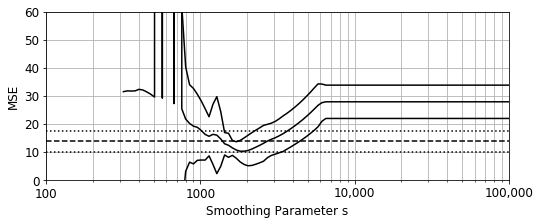

In [14]:
plt.plot(svals,mu,c="k")
plt.plot(svals,mu+1.96*s,c="k")
plt.plot(svals,mu-1.96*s,c="k")
plt.xscale("log")
plt.ylim(0,60)
plt.xlim(100,10**5)
plt.grid(which="both")
plt.plot([100,10**5],[mu1,mu1],c="k",ls="--")
plt.plot([100,10**5],[mu1+1.96*s1,mu1+1.96*s1],c="k",ls=":")
plt.plot([100,10**5],[mu1-1.96*s1,mu1-1.96*s1],c="k",ls=":")
plt.xlabel("Smoothing Parameter s",fontsize=12)
plt.ylabel("MSE",fontsize=12)
plt.xticks([100,1000,10**4,10**5],["100","1000","10,000","100,000"])
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
fig=plt.gcf()
#plt.ylim(0,50)
#plt.yscale("log")
fig.tight_layout()
fig.set_size_inches(8,3)
#fig.savefig("Smoothing-parameter-vs-MSE.pdf")

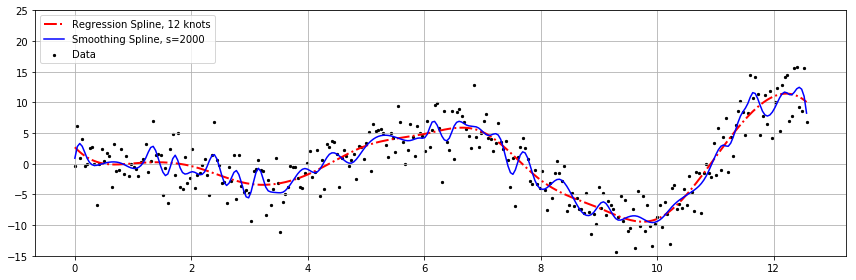

In [15]:
# plt.plot(X,LS(X,Y,t1)(X),c="k",ls="--",lw=.75, label="Regression Spline, 3 knotos")
plt.plot(X,LS(X,Y,np.arange(1,12,1))(X),c="red",ls="-.",
         lw=2,label="Regression Spline, 12 knots")
plt.plot(X,US(X,Y,s=2000)(X),c="blue",label="Smoothing Spline, s=2000")
plt.grid()
plt.scatter(X,Y,c="k",s=5,label="Data")
#plt.plot(X,X*np.cos(X),lw=3,ls="--",label="Target",c="k")
fig=plt.gcf()
fig.set_size_inches(12,4)
plt.legend(frameon=True,loc="upper left")
plt.ylim(-15,25);
fig.tight_layout()
#fig.savefig("reg-vs-smooth-spline.pdf")

In [16]:
def num_knots(X,Y,spar):
    return len(US(X,Y,s=spar).get_knots())

In [17]:
svals=np.logspace(2.5,4,100)
kvals=[num_knots(X,Y,sval) for sval in svals]

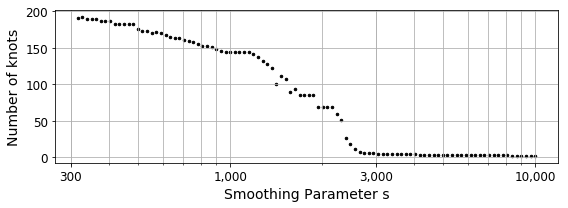

In [18]:
plt.scatter(svals,kvals,c="k",s=25,marker=".")
plt.xscale("log")
fig=plt.gcf()
fig.set_size_inches(8,3)
plt.xticks([300,1000,3000,10000],["300","1,000","3,000","10,000"])
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
plt.grid(which="both")
plt.xlabel("Smoothing Parameter s",fontsize=14)
plt.ylabel("Number of knots",fontsize=14)
fig.tight_layout()
#fig.savefig("spline-knots-vs-s.pdf")

In [19]:
n=100
u=US(X,Y,s=n)
u1=US(X,Y,s=5*n)
u2=US(X,Y,s=7*n)
u3=US(X,Y,s=10*n)
u4=US(X,Y,s=30*n)

n0=len(u.get_knots())
n1=len(u1.get_knots())
n2=len(u2.get_knots())
n3=len(u3.get_knots())
n4=len(u4.get_knots())

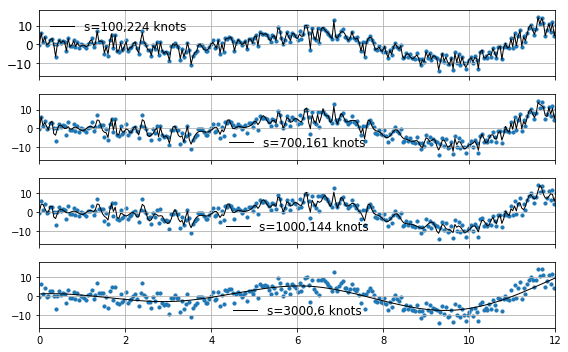

In [20]:
fig,ax=plt.subplots(ncols=1,nrows=4,sharex=True)
ax[0].plot(X,u(X),lw=1,c='k',label="s="+str(n)+","+str(n0)+" knots")
ax[0].legend(frameon=False,fontsize=12)
ax[0].scatter(X,Y,s=10)

#ax[1].plot(X,u1(X),lw=1,c="k",label="s="+str(5*n)+","+str(n1)+" knots")
#ax[1].legend(frameon=False,fontsize=12)
#ax[1].scatter(X,Y,s=10)

ax[1].plot(X,u2(X), lw=1,c="k",label="s="+str(7*n)+","+str(n2)+" knots")
ax[1].legend(frameon=False,fontsize=12)
ax[1].scatter(X,Y,s=10)

ax[2].plot(X,u3(X),lw=1,c="k",label="s="+str(10*n)+","+str(n3)+" knots")
ax[2].scatter(X,Y,s=10)
ax[2].legend(frameon=False,fontsize=12)

ax[3].plot(X,u4(X),lw=1,c="k",label="s="+str(30*n)+","+str(n4)+" knots")
ax[3].scatter(X,Y,s=10)
ax[3].legend(frameon=False,fontsize=12)

plt.xlim([0,12])
ax[0].tick_params(axis = 'both', which = 'major', labelsize = 12)

for a in ax:
    a.grid()

#plt.scatter(X,Y)
#fig=plt.gcf()
fig.set_size_inches(8,5)
fig.tight_layout()
#fig.savefig("spline-fits-various-parameters.pdf")
